In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1 - QR

1. Napisz funkcję dokonującą faktoryzacji QR macierzy A ∈ R n×n, A = [a1, a2, . . . , an] klasyczną metodą ortogonalizacji Grama-Schmidta:

In [43]:
def qr(A):
    Q = np.zeros(A.shape)
    R = np.zeros(A.shape)

    for k in range(A.shape[1]):
        Q[:, k] = A[:, k]
        for j in range(k):
            R[j, k] = np.dot(Q[:, j], A[:, k])
            Q[:, k] -= R[j, k] * Q[:, j]
        R[k, k] = np.linalg.norm(Q[:, k])
        Q[:, k] /= R[k, k]

    return Q, R

2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze.

In [44]:
for shape in range(5, 10):
    A = np.random.uniform(-10, 10, (shape, shape))
    Q, R = qr(A)
    Q1, R1 = np.linalg.qr(A)

    print("Shape: ", shape)
    if shape == 5:
        print("A: ")
        print(A)
        print("My Q and R: ")
        print(Q)
        print(R)
        print("Numpy Q and R: ")
        print(Q1)
        print(R1)
    print("Is Q orthonormal? ", np.allclose(Q.T @ Q, np.eye(shape)))
    print("Is R upper triangular? ", np.allclose(np.triu(R), R))
    print("Is QR = A? ", np.allclose(Q @ R, A))

Shape:  5
A: 
[[ 0.02143088  2.61531825 -1.41192372 -9.8716705   2.73731638]
 [-0.92061962  1.62337508  2.70239678  1.751124    5.87732985]
 [-2.92780302  1.5817785  -8.80282612  2.95518213  5.12277076]
 [ 3.50474602  7.39344694  4.48995734 -3.13280679 -0.89006889]
 [ 8.28233691 -4.28912398 -4.56768945 -9.1173587   2.43577667]]
My Q and R: 
[[ 0.00225525  0.28867294 -0.25691768 -0.92042711  0.05890751]
 [-0.09688029  0.16130849  0.19262862  0.05810934  0.96130708]
 [-0.30810381  0.11830462 -0.8908904   0.29205957  0.10996161]
 [ 0.36881771  0.88199595  0.0556361   0.25320758 -0.13728506]
 [ 0.8715817  -0.31422073 -0.31639601  0.00493663  0.20366606]]
[[  9.50265119  -1.65021466   0.12205223 -10.20437302  -0.34686406]
 [  0.           9.07268941   4.38230726  -2.11586107   0.79389112]
 [  0.           0.          10.42066288   2.9511786   -4.95514033]
 [  0.           0.           0.           9.21273962  -0.89516585]
 [  0.           0.           0.           0.           6.99275358]]


3. Wygeneruj 30-50 przykładowych macierzy 8×8 o różnym wskaźniku uwarunkowania (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

In [45]:
def gen_matrix(condition_number):
    U, S, V = np.linalg.svd(np.random.randint(-10, 10, size = (8, 8)))
    S = np.linspace(1, condition_number, 8)
    return U @ np.diag(S) @ V

In [46]:
matrices = [gen_matrix(1+i*10) for i in range(30)]

4. Dla każdej z uzyskanych w ten sposób macierzy Ai wyznacz faktoryzację QR korzystając z zaimplementowanej funkcji (Ai = QiRi). Przedstaw zależność ||I−QiTQik|| od cond(Ai).

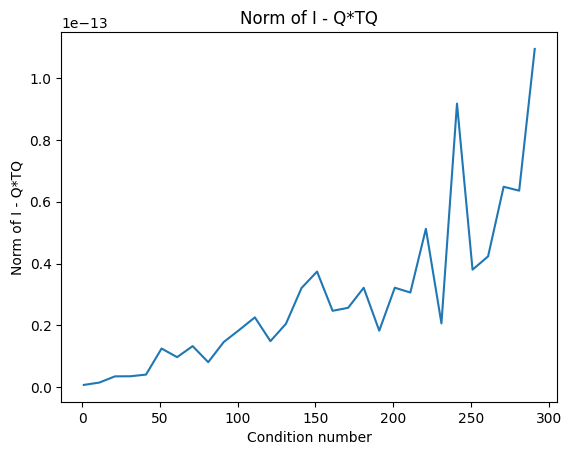

In [47]:
diffs = []
for A in matrices:
    Q, _ = qr(A)
    diffs.append((np.linalg.cond(A), np.linalg.norm(np.eye(A.shape[0]) - Q.T @ Q)))

plt.title("Norm of I - Q*TQ")
plt.xlabel("Condition number")
plt.ylabel("Norm of I - Q*TQ")
plt.plot([x[0] for x in diffs], [x[1] for x in diffs])

# Zadanie 2 - rozwiązywanie układów równań metodą QR

Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR. Następnie wykorzystaj ją do rozwiązania problemu aproksymacji średniokwadratowej dla zbioru punktów podanego tabeli poniżej. Przyjmij model postaci: f(x) = α0 + α1x + α2x^2 Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca f).

In [48]:
POINTS = [
    (-5, 2),
    (-4, 7),
    (-3, 9),
    (-2, 12),
    (-1, 13),
    (0, 14),
    (1, 14),
    (2, 13),
    (3, 10),
    (4, 8),
    (5, 4),
]

In [49]:
def plot_points(points):
    plt.scatter(*zip(*points))

In [50]:
def solve(points):
    n = len(points)
    A = np.zeros(shape=(n, 3))
    for i, (x, _y) in enumerate(points):
        A[i, :] = [x**2, x, 1]

    y = np.array([y for (_x, y) in POINTS])

    Q, R = np.linalg.qr(A)

    return np.linalg.inv(R) @ Q.T @ y

[-0.43356643  0.18181818 13.97202797]


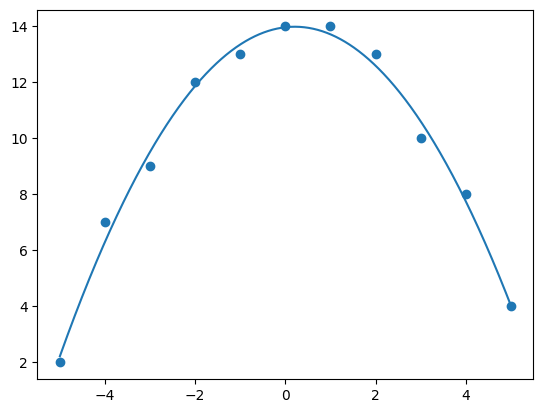

In [51]:
result = solve(POINTS)
print(result)
[a, b, c] = result
f = lambda x: a * x**2 + b*x + c
L, U = -5, 5
N = 1000
x_values = [L + i/N * (U - L) for i in range(N)]
y_values = [f(x) for x in x_values]
plot_points(POINTS)
plt.plot(x_values, y_values)
plt.show()